# Imports

In [29]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Reading the dataset

In [9]:
dataset = pd.read_csv("iris.csv")
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Preprocessing

## Label encoding of the output

In [10]:
label_encoder = LabelEncoder()
dataset['Species'] = label_encoder.fit_transform(dataset['Species'])
dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Converting the input into nump array

In [11]:
np_dataset = dataset.to_numpy()

## Separating inputs and output

In [12]:
X_data = np_dataset[:,0:4]
Y_data = np_dataset[:,4]

In [13]:
X_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
Y_data[:5]

array([0., 0., 0., 0., 0.])

## Scaling the input

In [15]:
X_data = StandardScaler().fit_transform(X_data)
X_data[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [18]:
Y_data[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## Splitting training and test data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.10)

In [20]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(135, 4) (135, 3) (15, 4) (15, 3)


# Creating the deep learning model

In [35]:
NB_CLASSES = 3

#Creating a Sequential Model
model = keras.models.Sequential()
model.add(
    keras.layers.Dense(
        128,
        input_shape=(4,),
        name = "Hidden-Layer-1",
        activation = 'relu'
    )
)
model.add(
    keras.layers.Dense(
        128,
        name="Hidden-Layer-2",
        activation='relu'
    )
)
model.add(
    keras.layers.Dense(
        NB_CLASSES,
        name="Output-Layer",
        activation='softmax'
    )
)
model.compile(loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Training and evaluation of the model

In [39]:
VERBOSE = 1
BATCH_SIZE = 16
EPOCHS = 15
VALIDATION_SPLIT = 0.2

history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    verbose=VERBOSE,
)

Epoch 1/15
7/7 [==============================] - 0s 20ms/step - loss: 0.2198 - accuracy: 0.9167 - val_loss: 0.2172 - val_accuracy: 0.9259
Epoch 2/15
7/7 [==============================] - 0s 10ms/step - loss: 0.2018 - accuracy: 0.9074 - val_loss: 0.2074 - val_accuracy: 0.9259
Epoch 3/15
7/7 [==============================] - 0s 11ms/step - loss: 0.1884 - accuracy: 0.9259 - val_loss: 0.1921 - val_accuracy: 0.9259
Epoch 4/15
7/7 [==============================] - 0s 10ms/step - loss: 0.1799 - accuracy: 0.9352 - val_loss: 0.2031 - val_accuracy: 0.9259
Epoch 5/15
7/7 [==============================] - 0s 10ms/step - loss: 0.1640 - accuracy: 0.9259 - val_loss: 0.1734 - val_accuracy: 0.9259
Epoch 6/15
7/7 [==============================] - 0s 10ms/step - loss: 0.1558 - accuracy: 0.9537 - val_loss: 0.1634 - val_accuracy: 0.9259
Epoch 7/15
7/7 [==============================] - 0s 10ms/step - loss: 0.1448 - accuracy: 0.9537 - val_loss: 0.1502 - val_accuracy: 0.9630
Epoch 8/15
7/7 [===========

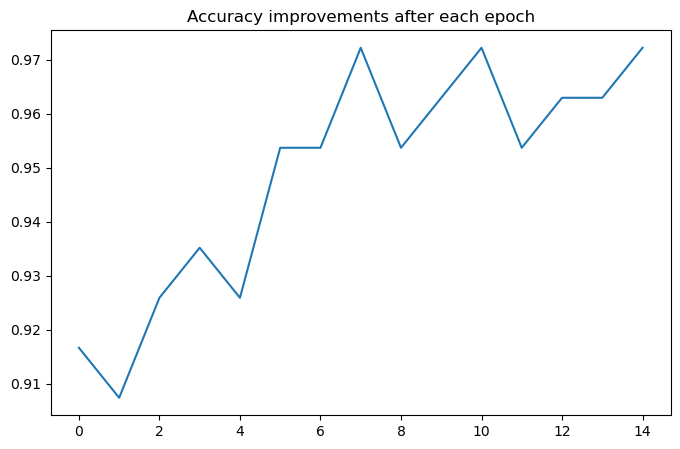

In [40]:
# Plot the accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvements after each epoch")
plt.show()

In [41]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 33ms/step - loss: 0.0690 - accuracy: 1.0000


[0.06900627166032791, 1.0]